# Steps for Getting Sentiment Scores:
New Dataset: Bitcoin  Contain 4 keywords

### 1. Preprocessing
   - Remove mentions, hashtag, RT, etc.
   
### 2. Remove ads 
   - Based on the rule of containing URL, retweet counts, favourite counts,etc. &nbsp;&nbsp;(Need more discussion)
   
### 3. Get sentiment score for each tweet
   - Method:  Getting scores directly with Python library 'Vader', without training our own model on labeled dataset.
   - Test on labeled dataset 'Twitter Samples': &nbsp;Accuracy rate: 0.8152
   
### 4. Calculate total score for each day
   - Weighted Average: two methods to get weight
    - favourite_count
   
    $$weight\_for\_each\_tweet = \frac{favourite\_count+1 }{total\_favourite\_count + total\_rows}$$ 
    (Total values are on daily basis.)   
    
    - followers_count
   <p>
   <p>
   - Final total score for each day: Average score of weighted_score_favourite and weighted_score_followers
   - Retweets count have been considered, they will appear repeatedly in data set.
       
### 5. Transforming daily score
   - Transform the range of the daily score from [-1,1] to [0,100] with linear transformation
    - Problem: Slight difference, hard to identify the change for each day.
    <p>
    - Fact: Most of the daily scores are in range [-0.4,0.4], few extreme cases are outside this range.
    
    - Solution: Amplify fluctuation range
    <p>
     Common situation:
     <p>
     
      - If score in [-0.4,0.4], use linear transformation to [0,100] 
      $$
      \begin{eqnarray}
      transformed\_score &=\frac{new\_range\_up - new\_range\_low}{old\_range\_up - old\_range\_low} * (daily\_score - old\_range\_low) + new\_range\_low \\
      &= \frac{100-0}{0.4-(-0.4)} * [daily\_score-(-0.4)] + 0
      \end{eqnarray}
      $$ 
      
      Extreme case, out of the range [-0.4,0.4], hard to happen
      - If score > 0.4, transformed score = 100
      - If score < 0.4, transformed score = 0

Amplify fluctuation range:
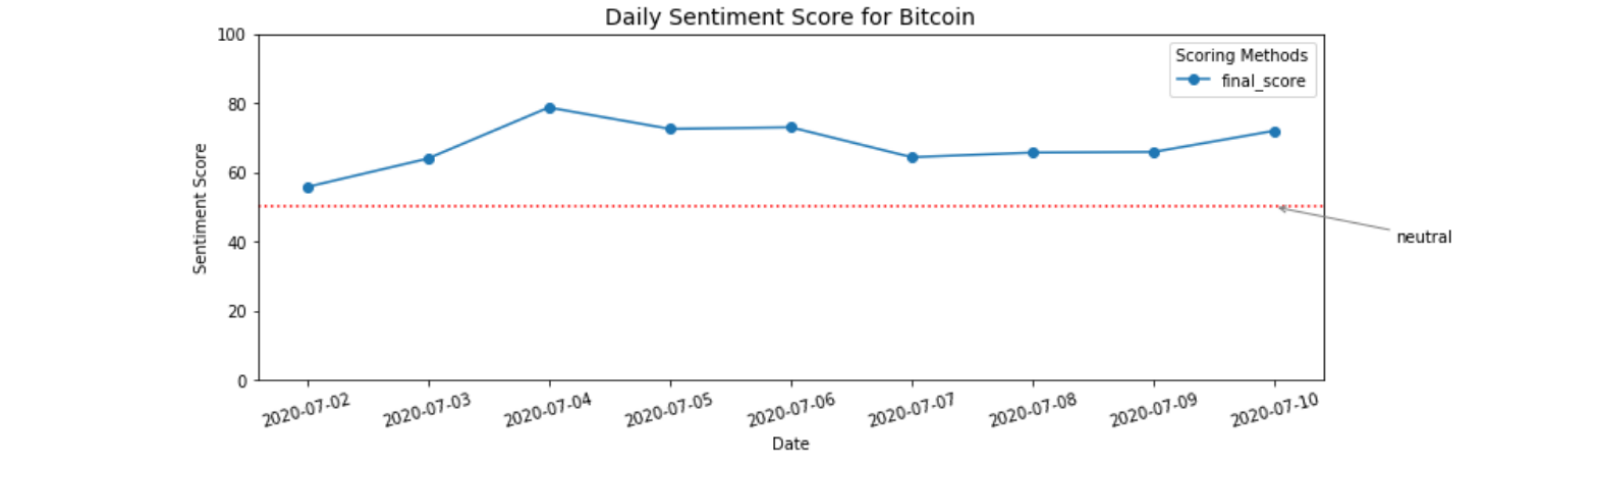

- **Overall Sentiment Grade Legend:**
 - Very positive: 80-100
 - Positive: 55-80
 - Neutral: 45-55
 - Negative: 20-45
 - Very negative: 0-20

<p>
    
- Future adjustment for the scale
 - More daily scores, adjust the scale regularly and automatically based on the ditribution of daily scores.
 - Use the maximum score we have ever had as 100, use the upper 20% percentile as the threshold to classify 'positive' and 'very positive'. 

# Result and Visualisation:

- Sentiment score for each tweet: 

In [115]:
data_scores     #Column 'Compound' is a compound sentiment score from python 'Vader'.

,text,date,favorite_count,retweet_count,followers_count,clean_text,compound
0,"If I gave you $100 worth of Bitcoin, would you...",2020-07-10,0,1318,3,"If I gave you worth of Bitcoin, would you ho...",0.2263
1,"If I gave you $100 worth of Bitcoin, would you...",2020-07-10,0,1318,47,"If I gave you worth of Bitcoin, would you ho...",0.2263
2,"If I gave you $100 worth of Bitcoin, would you...",2020-07-10,0,1318,0,"If I gave you worth of Bitcoin, would you ho...",0.2263
3,"@elerianm @Tesla Ah, bitcoin in a steel case. ...",2020-07-10,0,0,78,"Ah, bitcoin in a steel case. Fun to watch ...",0.5106
4,"If I gave you $100 worth of Bitcoin, would you...",2020-07-10,0,1318,199,"If I gave you worth of Bitcoin, would you ho...",0.2263
...,...,...,...,...,...,...,...
190065,Bitcoin bull Anthony Pompliano has convinced c...,2020-07-02,414,102,518998,Bitcoin bull Anthony Pompliano has convinced c...,0.6486
190066,Bitcoin is Showing “Signs of Exhaustion” as An...,2020-07-02,0,0,302,Bitcoin is Showing “Signs of Exhaustion” as An...,0.0000
190067,Getting my physical @terniotoken Blockcard in ...,2020-07-02,4,1,56,Getting my physical Blockcard in the next co...,0.7501
190068,@billburr @APompliano @bertkreischer @allthing...,2020-07-02,2,0,99,Step 1. Download a wallet (call Pomp a...,0.4215


In [158]:
#The tweet with the minimum score
data_scores.text.iloc[data_scores.compound.idxmin()]

'11/\n\n2010: Bitcoin is dead\n2011: Bitcoin is dead\n2012: Bitcoin is dead\n2013: Bitcoin is dead\n2014: Bitcoin is dead\n2015: Bitcoin is dead\n2017: Bitcoin is dead\n2018: Bitcoin is dead\n\nStill waiting...'

In [160]:
data_scores.iloc[data_scores.compound.idxmin()]

text               11/\n\n2010: Bitcoin is dead\n2011: Bitcoin is...
date                                                      2020-07-09
favorite_count                                                     1
retweet_count                                                      0
followers_count                                                 3357
clean_text         11/\n\n2010: Bitcoin is dead\n2011: Bitcoin is...
compound                                                     -0.9894
Name: 26845, dtype: object

In [159]:
#The tweet with the maximum score
data_scores.text.iloc[data_scores.compound.idxmax()]

'Happy birthday to a beautiful and good natured woman bitcoin.goddess .\n \nI wish you a very blessed year filled with love and laughter.\nMay GOD bless you now and always.\n\nLots of love sis ❤️❤️❤️\n\n#omalivingshow… https://t.co/CVR4CzPCak'

In [161]:
data_scores.iloc[data_scores.compound.idxmax()]

text               Happy birthday to a beautiful and good natured...
date                                                      2020-07-05
favorite_count                                                     0
retweet_count                                                      1
followers_count                                                 7133
clean_text         Happy birthday to a beautiful and good natured...
compound                                                      0.9879
Name: 105648, dtype: object

- Histogram of compound score for each tweet for the whole time period 7.2-7.10: 

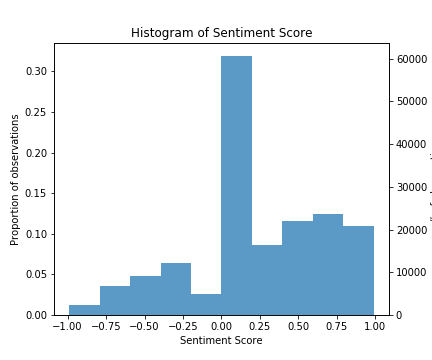

- Distribution of compound score for each tweet on daily basis:

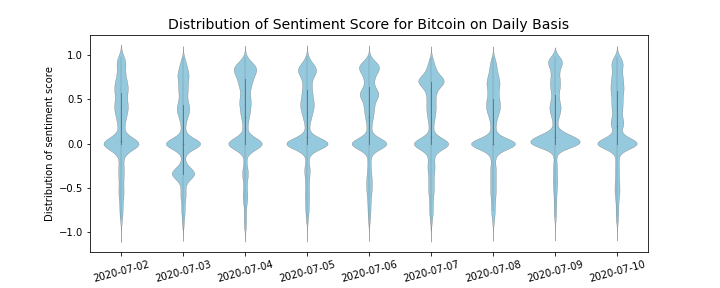

In [11]:
date_scores

,weighted_score_favorite,weighted_score_followers,final_score
date,,,
2020-07-02,0.097051,0.004465,0.050758
2020-07-03,0.112641,0.119418,0.116029
2020-07-04,0.218605,0.259071,0.238838
2020-07-05,0.215779,0.170357,0.193068
2020-07-06,0.205525,0.183740,0.194632
2020-07-07,0.182008,0.069087,0.125548
2020-07-08,0.162544,0.119530,0.141037
2020-07-09,0.163923,0.123256,0.143590
2020-07-10,0.232894,0.174103,0.203498


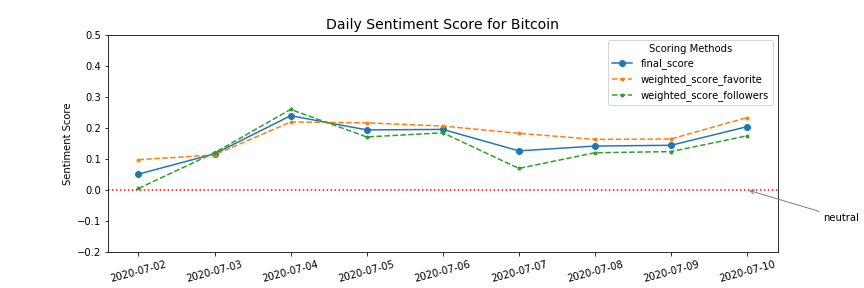

# Code:

In [ ]:
import pandas as pd
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [162]:
data = pd.read_csv(r'.\twitter_Bitcoin.csv',usecols=['text', 'date', 'favorite_count','retweet_count', 'followers_count'],encoding='utf-8-sig')

In [163]:
#Deal with ads
def url_detect(text):
    list_url = re.findall(r'https?:\/\/.*', text)
    return len(list_url)
data['url'] = data.text.apply(url_detect)

####################################################
likes_threshold = 2
retweets_thershold = 0
####################################################

mask1 = data.url > 0 
mask2 = data.favorite_count <= likes_threshold
mask3 = data.retweet_count <= retweets_thershold
ads_data = data[mask1 & mask2 & mask3].drop('url', axis=1)
#no_ads_data = data.drop(labels = ads_data.index).drop('url', axis=1)
no_ads_data = data.drop(labels = ads_data.index)

In [164]:
ads_data.shape

(39504, 5)

In [149]:
no_ads_data.shape

(163100, 6)

In [134]:
data = no_ads_data
data = data.reset_index(drop = True)

In [13]:
#cleaning
def clean(Series_text):
    Series_text = Series_text.replace(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+',
                                      " ", regex=True)  # remove URL
    Series_text = Series_text.replace({'[@#]\w+': " "}, regex=True)  # remove handle and tag
    Series_text = Series_text.replace({'RT[\s]+': " "}, regex=True)
    Series_text = Series_text.replace({'\$\w*': " "}, regex=True)

    return Series_text

In [135]:
data['clean_text'] = clean(data.text)
data.date = pd.to_datetime(data.date).dt.date

In [136]:
#Get score for each tweet
sid = SentimentIntensityAnalyzer()
sentiment_scores = data.clean_text.apply(sid.polarity_scores)
scores_df = pd.DataFrame(list(sentiment_scores))
data_scores = data.join(scores_df.compound)

In [4]:
data_scores.head()

,text,date,favorite_count,retweet_count,followers_count,clean_text,compound
0,"If I gave you $100 worth of Bitcoin, would you...",2020-07-10,0,1318,3,"If I gave you worth of Bitcoin, would you ho...",0.2263
1,"If I gave you $100 worth of Bitcoin, would you...",2020-07-10,0,1318,47,"If I gave you worth of Bitcoin, would you ho...",0.2263
2,"If I gave you $100 worth of Bitcoin, would you...",2020-07-10,0,1318,0,"If I gave you worth of Bitcoin, would you ho...",0.2263
3,"@elerianm @Tesla Ah, bitcoin in a steel case. ...",2020-07-10,0,0,78,"Ah, bitcoin in a steel case. Fun to watch ...",0.5106
4,"If I gave you $100 worth of Bitcoin, would you...",2020-07-10,0,1318,199,"If I gave you worth of Bitcoin, would you ho...",0.2263


In [142]:
data_scores.compound.describe()

count    163100.000000
mean          0.218120
std           0.458085
min          -0.989400
25%           0.000000
50%           0.100700
75%           0.624900
max           0.987900
Name: compound, dtype: float64

In [171]:
#Calculate weighted score and total score
def weight(df):
    nrows = len(df)
    sum_favorite = df.favorite_count.sum()
    sum_followers = df.followers_count.sum()
    laplace_weight_favorite = (df['favorite_count']+1)/(sum_favorite+nrows)
    weighted_score_favorite = (laplace_weight_favorite * df['compound']).sum()
    laplace_weight_followers = (df['followers_count'] + 1) / (sum_followers + nrows)
    weighted_score_followers = (laplace_weight_followers * df['compound']).sum()
    two_weights_scores = np.array([weighted_score_favorite,weighted_score_followers])

    return two_weights_scores


date_scores = pd.DataFrame(data_scores.groupby('date').apply(weight),columns=['weighted_scores'])
date_scores['final_score'] = date_scores.weighted_scores.apply(lambda x:x[0]*0.5+x[1]*0.5)
date_scores['weighted_score_favorite'] = date_scores['weighted_scores'].apply(lambda x: x[0])
date_scores['weighted_score_followers'] = date_scores['weighted_scores'].apply(lambda x: x[1])
date_scores = date_scores[['weighted_score_favorite','weighted_score_followers','final_score']]
date_scores

,weighted_score_favorite,weighted_score_followers,final_score
date,,,
2020-07-02,0.097051,0.004465,0.050758
2020-07-03,0.112641,0.119418,0.116029
2020-07-04,0.218605,0.259071,0.238838
2020-07-05,0.215779,0.170357,0.193068
2020-07-06,0.205525,0.183740,0.194632
2020-07-07,0.182008,0.069087,0.125548
2020-07-08,0.162544,0.119530,0.141037
2020-07-09,0.163923,0.123256,0.143590
2020-07-10,0.232894,0.174103,0.203498
